EPSS 136 Lab 3
San Andreas Fault Gravity Survey
Due: February 5, 2018


Introduction

The objectives of this lab are the following:
make corrections to the gravity data collected on the San Andreas Fault;
make a semi-infinite sheet model of a density contrast in order to infer the basin structure of the San Andreas Fault using a reasonable guess for starting model parameters.
Invert for the parameters of the perturbation to fit to data.
You will need the gravity survey data and matlab code posted on CCLE. 
Our gravity data was collected over a strike-slipfault so for your solution you will need to model the anomaly with a negative or positive gravity contrast for a semi-infinite sheet.

Data Entry, explanations

For each counter reading, we should have a location, elevation, and time at which we made the reading. We will correct the data for drift, latitude, and the Free Air correction, which means that we need vectors corresponding to the time, location and elevation for each point in addition to a vector containing the counter readings converted to mGals.
The following sections describe how you might best construct your vectors in Matlab so that you can make the corrections easily.
Please do not forget to average the data collected at the same location before fitting the data. 

2.1     Location
Our readings consisted of latitude and longitude in degrees. Once you have vectors of latitude and longitude in degrees, you may need to convert these points to distances in km along your profile. We will make the simplifying assumption that our gravity survey is simply a cross section of the sedimentary basin, that way we only need to find the distance from the end of the line to each point along it. Do this by setting our westernmost survey point as our origin, and using the GCD function in Matlab.
Plot the lat and lon to see the locations of the base and the sites first.


Gravity Corrections
Your gravity data should be entered in the same order as all of your other parameters so that every ith latitude etc. corresponds to the ith point in our survey. You are now ready to perform the following corrections on the data.

3.1     Latitude Correction
Please see p. 116 of the textbook. Because our survey does not extend over 10’s of kilometers, we can use the simplified equation 8.8. Please note that Matlab takes the argument of sin in radians.  The sind uses degrees as an argument.

32     Free Air Correction
Please see p. 116 in the textbook. This correction will be made using the elevation vector you have created. 

Semi-infinite sheet Model
Once you have your corrected gravity, plot it. Edit the code provided to formulate a gravity perturbation model due to a semi infinite sheet, referring to p40 of the Telford chapter posted to CCLE.

First, make sure your can plot the raw and corrected data. 
m
mNote: in order to plot the raw data plot on top of the corrected data, you can shift the either one by adding or subtracting a difference on the Y-axis between the curves. Here is what I mean:
plot(x,m,x,r)
                      plot(x,m,x,r+2)
y
r
y

r
x
x


Model Paremeters:
d_rho      = %density contrast, kg/m^3
thickness  = %sheet thickness, m
xoffset    = %distance offset of sheet edge from d=0 (in meters).
depth      = %depth of the sheet, m
background = %background gravity (3000 to 3400), shift along Y axis

I would suggest the following sequence choosing the model numbers:

Plot the corrected data. The X-axis units are in km from our new origin. Where would you place the sheet on the distance-axis so its edge approximately overlaps the data? That number is an xoffset estimate. 
What is an approximate San Andreas fault depth in our survey area? Use that number as a starting point for depth. Smaller depth will produce a more vertical model line. 
Density contrast (difference in density between the cylinder and the surrounding area) in given in SI units of kg/m3. Is 1000 too high, too low or just fine? Choose a reasonable number, it can be a negative as well.
background  is just a shift along Y-axis, you will be changing this a lot.


The expression for g is a quadratic equation and plots a parabola in a generic case. In theory, it is possible to find a pretty good fit but on practice that is hard to do. Try to fit at least a general trend of the corrected data. 

Report/Write up
Your write up should include a description of the experiment in a section entitled Introduction, and your data processing and relevant figures in a section called Data and Methods.  You should include figures showing figures containing both the corrected gravity and the raw gravity data (vs distance from reference), and figures showing the corrected data with the model fit. Please use different symbols to plot different data sets such as raw gravity and corrected gravity (for example ’*’ and ’+’) along with the legend command (use Help to see how to use this feature. In a section called Results you should include the model parameters and a discussion of your interpretation of the data. The report should end with the Conclusions section.

In [74]:
import numpy as np, matplotlib.pyplot as plt
import math
from obspy.geodetics.base import gps2dist_azimuth
from scipy.optimize import curve_fit

In [73]:
# DATA format [counter1, counter2, counter3, lat, lon, elevation1,2,3]
DATA=[
            [3042.10, 3042.03, 3041.75, 34.20567, -117.35238, 598, 602, 594],
            [3038.21, 3038.01, 3038.00, 34.20702, -117.35137, 606, 619, 610],
            [3033.02, 3032.83, 3032.91, 34.20853, -117.35045, 635, 642, 625],
            [3029.53, 3029.35, 3029.42, 34.21000, -117.34935, 646, 656, 650],
            [3023.05, 3023.02, 3023.17, 34.21193, -117.34835, 655, 687, 675],
            [3015.20, 3015.47, 3015.31, 34.21325, -117.34680, 733, 730, 727],
            [3010.70, 3011.04, 3010.75, 34.21405, -117.34499, 748, 752, 746],
            [3005.49, 3005.57, 3005.43, 34.21443, -117.34304, 779, 783, 775],
            [2999.09, 2999.42, 2999.19, 34.21603, -117.34229, 823, 815, 817],
            [2994.38, 2994.70, 2994.25, 34.21752, -117.34113, 847, 845, 835],
            [2987.57, 2987.81, 2987.67, 34.21898, -117.34023, 882, 875, 858]
]
DATA = np.array(DATA)

lat = DATA[:,3]   
lon = DATA[:,4] 

#Extract Latitude, longitude, and height of readings %height=mean(DATA(:,6:8),2);
height = np.average(DATA[:,5:],axis=1)  

#Average instrument readings at each point           %avg_read=median(DATA(:,1:3),2);
avg_read = np.average(DATA[:,:3],axis=1)                      


In [40]:
# Convert instrument readings to uncorrected milligal values (g0).
g0 = np.zeros(len(avg_read))                                             
g0[:8] = 3081.82 + 1.0278 * (avg_read[:8] - 3000)  
g0[8:] = 2979.04 + 1.02778 * (avg_read[8:] - 2900)   

#Calculate lattitude correction differential from reference point (point 1)
lat_correction = 0.000812 * math.sin( 2 * lat[0] / 57.295) * (111000 * (lat - lat[0]))  

#Apply free air correction, bougher terrain correction, and lattiude correction.
ydata = g0 + height * (0.308 - 0.12)-lat_correction

#Calculate each point's distance from first point in meters.
xdata = np.zeros(len(lat))
for i in range(len(lat)):
    xdata[i] ,_ , _=gps2dist_azimuth(lat[i],lon[i],lat[0],lon[0])                              
    

In [59]:
def model(x, d_rho, thickness, xoffset, depth, background):
    '''
    d_rho     ===  density contrast, kg/m^3
    thickness ===  sheet thickness, m
    xoffset   ===  distance offset of sheet edge from d=0 (in meters).
    depth     ===  depth of the sheet, m
    background===  background gravity (3000 to 3400), shift along Y axis
    '''

    G = -6.672 * 10 ** (-11) * 10 ** (5)  # convert m/s^2 to mGal
    x = x - xoffset 
    return ( 2* G * d_rho * thickness * ( math.pi / 2 + np.arctan( x / depth ))) + background # From Telford, 2.67, p.40


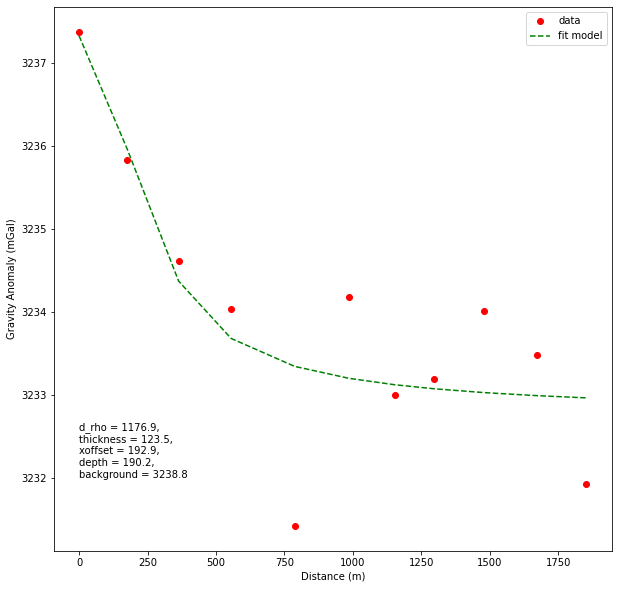

In [83]:
# Create start parameter set p0 from which to invert. Format: p=[drho,thickness,xoff,h,y_shift]
p0 = [800, 100, 600, 100, 3234]
# Invert xdata ydata for fitted parameter set popt 
popt, pcov = curve_fit(model, xdata, ydata, p0=p0)

# Plot fitted model values vs. data.
plt.figure(figsize=(10,10))
plt.plot(xdata,ydata,'ro',label='data')
plt.plot(xdata, model(xdata, *popt), 'g--',
        label='fit model' )
plt.xlabel('Distance (m)')
plt.ylabel('Gravity Anomaly (mGal)')
plt.legend()
plt.text(0,3232,'d_rho = %5.1f,\nthickness = %5.1f,\nxoffset = %5.1f,\ndepth = %5.1f,\nbackground = %5.1f' % tuple(popt))
plt.show()